# Test EV control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from tqdm import tqdm
import scipy.stats as stats

In [2]:
# manually search perceptron hyperparameters for binary classification
import cProfile as profile
import pstats

In [3]:
# --- Response ---
from ev_ssm import ev_ssm
import numpy as np

sse = ev_ssm(ts=18, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA",
             n_pref=1, is_report=True,
             tt_mean=0.5, tt_var=0.2, tt_lb=0, tt_ub=1,
             ict_off=False, ecc_off=False)
sse.load_A("Aest.csv")

evd0 = sse.ev.copy()

# quiet some EVs by force
# np.random.seed(sse.config["seed"])
# ict_rid = np.random.randint(low=0,
#                             high=sse.ev.shape[0],
#                             size=3000)

# sse.ev.na.iloc[ict_rid] = sse.ev.nam.iloc[ict_rid]
# sse.ev.lc.iloc[ict_rid] = 1
# sse.g_u()

# initial EV data
evd0 = sse.ev.copy()

sse.g_frc()

EVA: ts=18[H], 10000 EVs, Total Q=87.7 MWh
Online 2925, Q=73.03 MWh, SoC=0.7717
Power(MW): Pt=-7.9463, Pc=-7.9463, Pd=-0.0
Ctrl: 0=1584; 1=1341; 
EVA: Load A from Aest.csv.


[23.844112764286482, 1.82771328502618]

In [4]:
prof = profile.Profile()
prof.enable()
for i in range(20):
        sse.run(tf=18 + i/3600, Pi=0.5*i,
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True)
for i in range(20):
        sse.run(tf=18 + (20 + i)/3600, Pi=10 - 0.5*i,
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True)
prof.disable()

EVA: end time 18.0[H] is too close to start time 18[H],simulation will not start.


(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

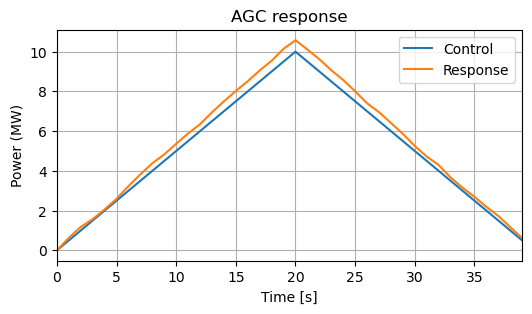

In [5]:
sse.plot_agc()

In [ ]:
sse.ev.iloc[0]

In [ ]:
stats = pstats.Stats(prof).strip_dirs().sort_stats("tottime")
stats.print_stats(20)

In [ ]:
sse.run(tf=18 + 10/3600, Pi=0,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)

# sse.run(tf=18 + 100/3600, Pi=0,
#         is_updateA=False, is_rstate=True,
#         is_test=False, disable=False)

In [ ]:
sse.plot_agc()

In [ ]:
sse.plot()